In [1]:
import sys; sys.path.append("../../")
from DataPreprocessing.DataPreprocessing import *
from DataExploration import *
import matplotlib.pyplot as plt
import seaborn as sns

# Question:
    Is there a certain publisher whose sales are most coming from a certain region?




## 1- Expectations:   
        For most of the publishers, the sales are coming from some specific regions.

## 2- Data Collection: 
    

## Read data 

In [2]:
df = read_data(kind='dataset')


## Handle Missing Values

In [3]:
df2 = df.copy()
df2 = handle_missing_values(df2, handling_method='mode_knn')
df =handle_missing_values(df)
df.head()

Total Number of rows : 16719
Number of rows with missing values: 9894
Number of rows after handling missing values: 16719 and Number of missing values: 0
Total Number of rows : 16719
Number of rows with missing values: 9894
Number of rows after dropping: 6825
Number of rows after handling missing values: 6825 and Number of missing values: 0


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [4]:
# count unique publishers
df['Publisher'].nunique()

262

In [5]:
# Compare sales of each publisher for NA, EU, JA, others
dfg_publishers = df.groupby('Publisher')
dfg_publishers2 = df2.groupby('Publisher')

dfg_publishers.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16550,Wade Hixton's Counter Punch,GBA,2004.0,Sports,"Destination Software, Inc",0.01,0.00,0.00,0.00,0.01,78.0,13.0,9.5,4.0,Inferno Games,T
16576,King's Bounty: Armored Princess,PC,2009.0,Role-Playing,1C Company,0.00,0.01,0.00,0.00,0.01,82.0,25.0,8.6,158.0,Katauri Interactive,T
16624,Trine,PC,2009.0,Action,Nobilis,0.00,0.01,0.00,0.00,0.01,80.0,50.0,8.2,488.0,"Frozenbyte, Inc.",E10+
16634,Sébastien Loeb Rally Evo,XOne,2016.0,Racing,Milestone S.r.l,0.00,0.01,0.00,0.00,0.01,63.0,8.0,8.2,22.0,Milestone S.r.l,E


In [6]:
sales_df = pd.DataFrame(columns=['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])
sales_df2 = pd.DataFrame(columns=['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])
for i, (a, publisher) in enumerate(dfg_publishers):
    tmp_df = pd.DataFrame({
        'Publisher': a, 
        'NA_Sales': publisher['NA_Sales'].sum(), 
        'EU_Sales': publisher['EU_Sales'].sum(), 
        'JP_Sales': publisher['JP_Sales'].sum(), 
        'Other_Sales': publisher['Other_Sales'].sum(),
        'Global_Sales': publisher['Global_Sales'].sum()
        }, index=[i])
    sales_df = pd.concat([sales_df, tmp_df], ignore_index=True)

for i, (a, publisher) in enumerate(dfg_publishers2):
    tmp_df = pd.DataFrame({
        'Publisher': a, 
        'NA_Sales': publisher['NA_Sales'].sum(), 
        'EU_Sales': publisher['EU_Sales'].sum(), 
        'JP_Sales': publisher['JP_Sales'].sum(), 
        'Other_Sales': publisher['Other_Sales'].sum(),
        'Global_Sales': publisher['Global_Sales'].sum()
        }, index=[i])
    sales_df2 = pd.concat([sales_df2, tmp_df], ignore_index=True)

sales_df = sales_df.sort_values(by=['Global_Sales'], ascending=False)
sales_df2 = sales_df2.sort_values(by=['Global_Sales'], ascending=False)
sales_df

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
61,Electronic Arts,465.45,289.24,10.85,102.92,868.55
160,Nintendo,371.36,242.11,173.80,62.41,849.49
11,Activision,306.82,166.54,5.31,57.01,535.74
199,Sony Computer Entertainment,176.87,117.53,39.92,53.78,388.10
223,Take-Two Interactive,187.82,106.24,5.56,50.55,350.17
...,...,...,...,...,...,...
63,Encore,0.01,0.00,0.00,0.00,0.01
127,Lighthouse Interactive,0.00,0.01,0.00,0.00,0.01
158,NewKidCo,0.01,0.00,0.00,0.00,0.01
36,CDV Software Entertainment,0.00,0.01,0.00,0.00,0.01


In [7]:
max_sales_df = sales_df.iloc[:, 1:-1]
max_sales_df.loc[:, 'Max_Sales'] = max_sales_df.idxmax(axis=1)
max_sales_df2 = sales_df2.iloc[:, 1:-1]
max_sales_df2.loc[:, 'Max_Sales'] = max_sales_df2.idxmax(axis=1)
max_sales_df.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Max_Sales
61,465.45,289.24,10.85,102.92,NA_Sales
160,371.36,242.11,173.80,62.41,NA_Sales
11,306.82,166.54,5.31,57.01,NA_Sales
199,176.87,117.53,39.92,53.78,NA_Sales
223,187.82,106.24,5.56,50.55,NA_Sales


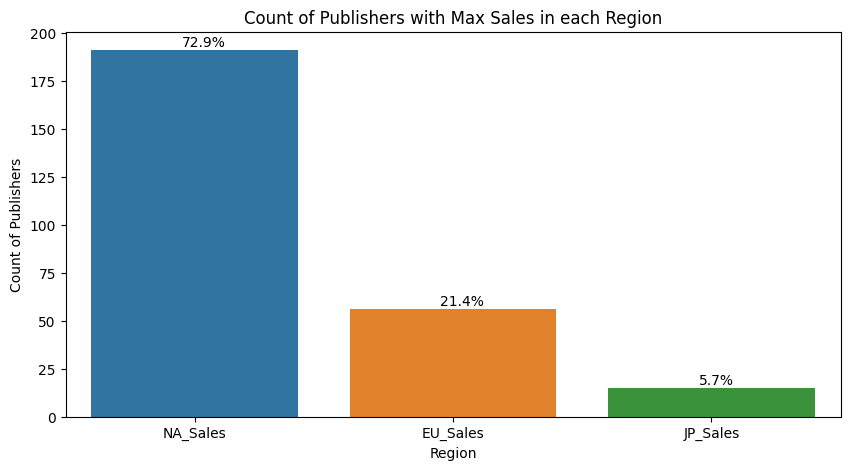

In [8]:
# plot histogram of column Max_Sales
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Max_Sales', data=max_sales_df)
total = len(max_sales_df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 2
    ax.annotate(percentage, (x, y))

plt.title('Count of Publishers with Max Sales in each Region')
plt.xlabel('Region')
plt.ylabel('Count of Publishers')
plt.show()


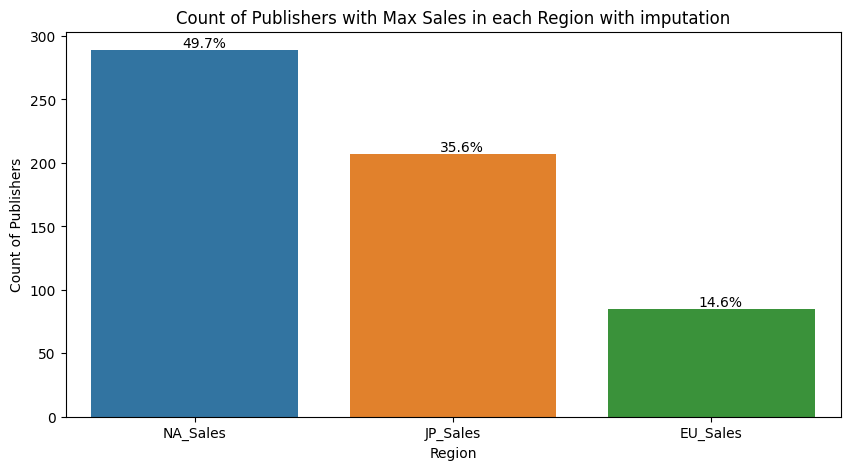

In [9]:
# plot histogram of column Max_Sales
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Max_Sales', data=max_sales_df2)
total = len(max_sales_df2)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 2
    ax.annotate(percentage, (x, y))

plt.title('Count of Publishers with Max Sales in each Region with imputation')
plt.xlabel('Region')
plt.ylabel('Count of Publishers')
plt.show()


In [10]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


In [13]:
# NA_Count
max_NA_count = max_sales_df[max_sales_df['Max_Sales'] == 'NA_Sales'].shape[0]
max_NA_count2 = max_sales_df2[max_sales_df2['Max_Sales'] == 'NA_Sales'].shape[0]
print('Max NA Count: ', max_NA_count)
print('Percentage of NA Count: ', max_NA_count / max_sales_df.shape[0])
print('Max NA Count with imputation: ', max_NA_count2)
print('Percentage of NA Count with imputation: ', max_NA_count2 / max_sales_df2.shape[0])

# EU_Count
max_EU_count = max_sales_df[max_sales_df['Max_Sales'] == 'EU_Sales'].shape[0]
max_EU_count2 = max_sales_df2[max_sales_df2['Max_Sales'] == 'EU_Sales'].shape[0]
print('Max EU Count: ', max_EU_count)
print('Percentage of EU Count: ', max_EU_count / max_sales_df.shape[0])
print('Max EU Count with imputation: ', max_EU_count2)
print('Percentage of EU Count with imputation: ', max_EU_count2 / max_sales_df2.shape[0])

# JP_Count
max_JP_count = max_sales_df[max_sales_df['Max_Sales'] == 'JP_Sales'].shape[0]
max_JP_count2 = max_sales_df2[max_sales_df2['Max_Sales'] == 'JP_Sales'].shape[0]
print('Max JP Count: ', max_JP_count)
print('Percentage of JP Count: ', max_JP_count / max_sales_df.shape[0])
print('Max JP Count with imputation: ', max_JP_count2)
print('Percentage of JP Count with imputation: ', max_JP_count2 / max_sales_df2.shape[0])


Max NA Count:  191
Percentage of NA Count:  0.7290076335877863
Max NA Count with imputation:  289
Percentage of NA Count with imputation:  0.4974182444061962
Max EU Count:  56
Percentage of EU Count:  0.21374045801526717
Max EU Count with imputation:  85
Percentage of EU Count with imputation:  0.14629948364888123
Max JP Count:  15
Percentage of JP Count:  0.05725190839694656
Max JP Count with imputation:  207
Percentage of JP Count with imputation:  0.35628227194492257


In [39]:
import folium

# Sample data for publishers that have their maximum sales in some location
publishers_counts = {
    "NA": max_NA_count,
    "EU": max_EU_count,
    "JP": max_JP_count
}
locations = {
    "NA": [47.650589, -100.437012],
    "EU": [50.0661, 14.4222],
    "JP": [36.2048, 138.2529]
}

# Create the base map centered at (0,0) with zoom level 2
map = folium.Map(location=[0,0], zoom_start=2)

# Add a circle marker for each location, with size proportional to the sales amount
for location, sales in publishers_counts.items():
    lat, long = locations[location]
    folium.CircleMarker(
        location=[lat, long], # latitude and longitude coordinates of the location
        radius=sales, # set radius of circle proportional to sales
        popup=f"{location}: {sales}", # popup text showing location name and sales amount
        color='red', # set color of circle
        fill=True,
        fill_color='red',
    ).add_to(map)

for location_k, location_v in locations.items():
    folium.map.Marker(
        location=location_v,
        icon=folium.DivIcon(
            icon_size=(700,36),
            icon_anchor=(30,30),
            html=f'<div style="font-size: 20pt">{location_k} : {publishers_counts[location_k]}</div>',
        )
    ).add_to(map)

from IPython.display import HTML, display
display(HTML("<div style='font-size: 20pt'>Count of publishers with maximum sales in each region</div>"))
display(map)


## 3- Comparing Expectations to data:
        We see that most Publishers (72.9% of the publishers if dropping N/A rows, and 50% if imputed) have their overall sales coming from North America. and thus we conclude that our expectations are met (most of the publishers have their sales coming from some specific regions).


TODO Why are results so different after imputation? is it imputation problem or is the dataset biased?